In [40]:
import warnings  
warnings.filterwarnings("ignore")  
  
import pandas as pd  
pd.set_option("display.max_columns",None)  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler  
  
import torch  
import torch.nn as nn  
from torch.utils.data import TensorDataset,DataLoader  

In [41]:
dataframe=pd.read_csv("dataset_phishing.csv")  

In [42]:
dataframe.shape  

(11430, 89)

In [43]:
dataframe.head()  

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [44]:
# removing url features  
dataframe=dataframe.drop(labels="url",axis=1)  
dataframe.head()  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [45]:
# checking object dtype features  
object_features=[col for col in dataframe.columns if dataframe[col].dtype=="O"]  
print(object_features)  

['status']


In [46]:
# checking unique values and counts from the collected object features  
dataframe['status'].value_counts()  

legitimate    5715
phishing      5715
Name: status, dtype: int64

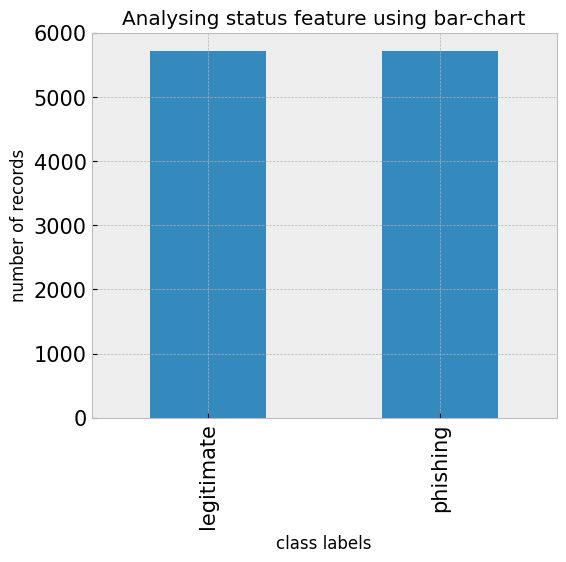

In [47]:
with plt.style.context(style="bmh"):  
    fig=dataframe['status'].value_counts().plot.bar(figsize=(6,5),  
                                             fontsize=15,  
                                             title='Analysing status feature using bar-chart',  
                                            xlabel='class labels',  
                                            ylabel='number of records')  
    plt.show()  

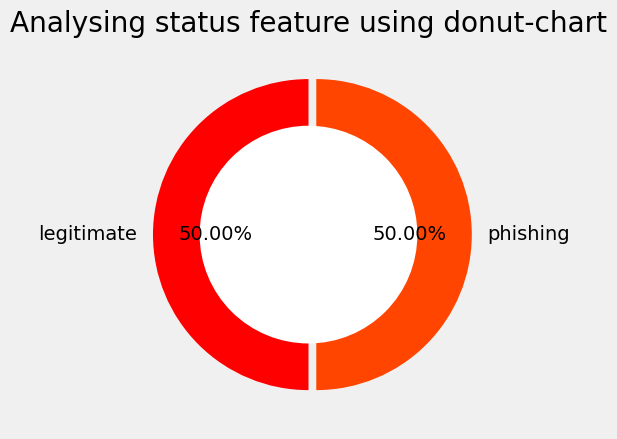

In [48]:
with plt.style.context(style="fivethirtyeight"):  
    plt.pie(x=dict(dataframe['status'].value_counts()).values(),  
           labels=dict(dataframe['status'].value_counts()).keys(),  
           autopct="%.2f%%",  
           colors=['red','orangered'],  
           startangle=90,  
           explode=[0,0.05])  
    centre_circle=plt.Circle((0,0),0.70,fc='white')  
    fig=plt.gcf()  
    fig.gca().add_artist(centre_circle)  
    plt.title(label="Analysing status feature using donut-chart")  
    plt.show()  

In [49]:
dataframe.head()  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [50]:
class_labels=dataframe['status'].unique().tolist()  
class_labels.sort()  
print(class_labels)  

['legitimate', 'phishing']


In [51]:
class_dict={}  
for idx,label in enumerate(class_labels):  
    class_dict[label]=idx  
print(class_dict)  

{'legitimate': 0, 'phishing': 1}


In [52]:
# label encoding  
dataframe['status']=dataframe['status'].map(class_dict)  
dataframe.head()  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,0


In [53]:
X=dataframe.iloc[:,:-1]  
y=dataframe.iloc[:,-1:]  
  
X.head()  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6


In [54]:
y.head()  

,status
0,0
1,1
2,1
3,0
4,0


In [55]:
# data normalizationnormalization using MinMaxScaler  
scaler=MinMaxScaler()  
scaler.fit(X.values)  
X_scaled=scaler.transform(X.values)  
print(X_scaled)  

[[0.01534684 0.07142857 0.         ... 1.         1.         0.4       ]
 [0.03990178 0.09047619 1.         ... 0.         1.         0.2       ]
 [0.06998158 0.21904762 1.         ... 0.         1.         0.        ]
 ...
 [0.05709024 0.05714286 1.         ... 0.         1.         1.        ]
 [0.01596071 0.12380952 0.         ... 0.         0.         0.4       ]
 [0.2854512  0.04761905 1.         ... 1.         1.         0.        ]]


In [57]:
import pickle  
with open(file="scaler.pkl",mode="wb") as file:  
    pickle.dump(obj=scaler,file=file)  
  
  
new_X=pd.DataFrame(data=X_scaled,columns=X.columns)  
new_X.head()  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,0.015347,0.071429,0.0,0.086957,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.028571,0.027397,0.066667,0.052632,0.075,0.010883,0.163934,0.007238,0.029703,0.157895,0.018000,0.0,0.0,0.0,0.0,0.0,0.0,0.003649,0.529412,0.470588,0.0,0.0,0.0,0.437500,0.0,0.500000,0.0,0.0,0.800000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.001542,0.000854,0.000000,1.0,1.0,0.4
1,0.039902,0.090476,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.304994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.028571,0.027397,0.033333,0.473684,0.050,0.036276,0.295082,0.038601,0.108911,0.473684,0.058667,0.0,0.0,0.0,0.0,0.0,0.0,0.006439,0.966667,0.033333,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.800000,0.200000,0.0,0.0,0.0,1.000,0.0,0.0,0.0,1.0,0.0,0.0,0.002615,0.448471,0.000000,0.0,1.0,0.2
2,0.069982,0.219048,1.0,0.130435,0.023256,0.0,0.333333,0.105263,0.0,0.157895,0.111111,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.208313,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.166667,0.0,0.104762,0.013699,0.033333,0.052632,0.050,0.018138,0.196721,0.020507,0.049505,0.194737,0.032571,0.0,0.0,0.0,0.0,0.0,0.0,0.000859,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000,0.0,0.0,0.0,1.0,0.0,0.0,0.000503,0.311656,0.541310,0.0,1.0,0.0
3,0.003683,0.033333,0.0,0.043478,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.133333,0.105263,0.000,0.003628,0.065574,0.000000,0.023762,0.105263,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.031981,0.973154,0.026846,0.0,0.0,0.0,0.125000,0.0,0.250000,0.0,0.0,1.000000,0.0,0.964286,0.035714,0.0,0.0,0.0,0.625,0.0,0.0,0.0,1.0,0.0,0.0,0.002112,0.000854,0.010004,0.0,0.0,0.3
4,0.026397,0.052381,0.0,0.043478,0.046512,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.166667,0.0,0.047619,0.020548,0.066667,0.052632,0.100,0.010883,0.098361,0.013269,0.034323,0.105263,0.028000,0.0,0.0,0.0,0.0,0.0,0.0,0.021893,0.470588,0.529412,0.0,0.0,0.0,0.268519,0.0,0.018519,1.0,0.0,0.764706,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.007543,0.635341,0.000810,0.0,0.0,0.6


In [58]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)  
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)  

(9144, 87) (9144, 1) (2286, 87) (2286, 1)


In [59]:
X_train.head()  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
7609,0.031921,0.057143,1.0,0.043478,0.093023,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.032258,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.00,0.0,0.151095,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.166667,0.0,0.057143,0.027397,0.033333,0.052632,0.050,0.012092,0.114754,0.014475,0.036209,0.118421,0.028000,0.0,0.0,0.0,0.0,0.0,0.0,0.018459,0.953488,0.046512,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.714286,0.0,0.0,0.0,1.0,0.0,0.0,0.016493,0.614698,0.000087,0.0,1.0,0.6
6408,0.071209,0.219048,1.0,0.130435,0.023256,0.0,0.333333,0.105263,0.0,0.157895,0.111111,0.0,0.000000,0.096774,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.00,0.0,0.259021,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.166667,0.0,0.114286,0.027397,0.033333,0.052632,0.050,0.018138,0.196721,0.020507,0.045697,0.194737,0.029500,0.0,0.0,0.0,0.0,0.0,0.0,0.000859,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000503,0.311578,0.540177,0.0,1.0,0.0
7464,0.041130,0.033333,0.0,0.217391,0.046512,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.193548,0.0,0.166667,0.0,0.0,0.0,0.0,0.5,0.166667,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.085714,0.034247,0.033333,0.105263,0.050,0.013301,0.065574,0.015682,0.025347,0.105263,0.020889,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002749,0.000854,0.000000,0.0,1.0,0.3
9286,0.053407,0.057143,0.0,0.043478,0.046512,0.0,0.333333,0.105263,0.0,0.157895,0.000000,0.0,0.052083,0.064516,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.153494,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.166667,0.0,0.152381,0.013699,0.000000,0.105263,0.025,0.029021,0.081967,0.031363,0.017705,0.118421,0.016267,0.0,1.0,0.0,0.0,0.0,0.0,0.007942,0.054054,0.945946,0.0,0.008065,0.0,0.014286,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.086957,0.0,0.0,0.0,0.0,1.0,0.0,0.030506,0.724042,0.000001,0.0,1.0,0.7
5159,0.019644,0.047619,1.0,0.086957,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.096774,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.219775,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.047619,0.006849,0.033333,0.026316,0.075,0.007255,0.114754,0.008444,0.022442,0.105263,0.019000,0.0,0.0,0.0,0.0,0.0,0.0,0.015239,0.943662,0.056338,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0,1.0,0.866667,0.0,0.5,0.5,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.004928,0.556573,0.000217,0.0,1.0,0.3


In [60]:
X_test.head()  

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
6172,0.028852,0.028571,0.0,0.086957,0.023256,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.047619,0.000000,0.033333,0.052632,0.050,0.012092,0.032787,0.014475,0.035644,0.052632,0.0288,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000034,0.000854,0.000000,0.0,1.0,0.0
9810,0.065071,0.161905,1.0,0.043478,0.023256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.161290,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.166667,0.0,0.0,1.0,0.269264,0.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.057143,0.034247,0.066667,0.052632,0.150,0.036276,0.475410,0.038601,0.097313,0.407895,0.0536,0.0,0.0,0.0,0.0,0.0,0.0,0.016098,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.006135,0.100186,0.000000,0.0,1.0,0.0
8537,0.025783,0.090476,0.0,0.043478,0.023256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.096774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.025582,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.006849,0.033333,0.210526,0.050,0.008464,0.131148,0.009650,0.034323,0.210526,0.0200,0.0,0.0,0.0,0.0,0.0,0.0,0.016098,0.106667,0.893333,0.0,0.096774,0.0,0.044776,0.0,0.0,0.0,1.0,0.0,0.0,0.142857,0.857143,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,0.0,0.007744,0.011408,0.000000,0.0,1.0,0.0
605,0.016575,0.085714,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.064516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009524,0.006849,0.200000,0.447368,0.175,0.019347,0.278689,0.008444,0.083168,0.447368,0.0280,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.002045,0.000854,0.000000,0.0,1.0,0.0
6549,0.007980,0.057143,0.0,0.043478,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.009524,0.020548,0.066667,0.052632,0.000,0.008464,0.131148,0.000000,0.031683,0.131579,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.010088,0.978723,0.021277,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.937500,0.062500,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.000034,0.489058,0.042796,0.0,0.0,0.3


In [61]:
y_train.head()  

,status
7609,0
6408,1
7464,1
9286,0
5159,0


In [62]:
y_test.head()  

,status
6172,1
9810,1
8537,1
605,1
6549,0


In [63]:
train_input_tensor=torch.from_numpy(X_train.values).float()  
train_label_tensor=torch.from_numpy(y_train['status'].values).float()  
val_input_tensor=torch.from_numpy(X_test.values).float()  
val_label_tensor=torch.from_numpy(y_test['status'].values).float()  
  
  
train_input_tensor 

tensor([[0.0319, 0.0571, 1.0000,  ..., 0.0000, 1.0000, 0.6000],
        [0.0712, 0.2190, 1.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0411, 0.0333, 0.0000,  ..., 0.0000, 1.0000, 0.3000],
        ...,
        [0.0147, 0.1190, 0.0000,  ..., 0.0000, 1.0000, 0.5000],
        [0.0246, 0.0857, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0270, 0.0524, 0.0000,  ..., 0.0000, 1.0000, 0.2000]])

In [64]:
train_label_tensortrain_label_tensor=train_label_tensor.unsqueeze(1)  
train_label_tensor  

tensor([0., 1., 1.,  ..., 1., 1., 1.])

In [65]:
val_input_tensor  

tensor([[0.0289, 0.0286, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0651, 0.1619, 1.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0258, 0.0905, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [0.0123, 0.0952, 0.0000,  ..., 0.0000, 0.0000, 0.4000],
        [0.0411, 0.0571, 0.0000,  ..., 0.0000, 0.0000, 0.4000],
        [0.0092, 0.0714, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [66]:
val_label_tensorval_label_tensor=val_label_tensor.unsqueeze(1)  
val_label_tensor  

tensor([1., 1., 1.,  ..., 0., 0., 0.])

In [67]:
 #wrapping training tensors and validation tensors  
train_dataset=TensorDataset(train_input_tensor,train_label_tensor)  
val_dataset=TensorDataset(val_input_tensor,val_label_tensor)  
  
# performing splitting tensors into batches and shuffling the data, and making wrapped tensors as iterative  
train_loader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)  
val_loader=DataLoader(dataset=val_dataset,batch_size=32,shuffle=True)  
  
  
print(f"number of batches in train_loader: {len(train_loader)}")  
print(f"number of records in train_loader: {len(train_loader.dataset)}")  
print(f"number of batches in val_loader: {len(val_loader)}")  
print(f"number of records in val_loader: {len(val_loader.dataset)}")  

number of batches in train_loader: 286
number of records in train_loader: 9144
number of batches in val_loader: 72
number of records in val_loader: 2286


In [69]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")  
device  

device(type='cpu')

In [70]:
class MLP(nn.Module):  
    def __init__(self,dropout=0.4):  
        super(MLP,self).__init__()  
        self.network=nn.Sequential(  
            nn.Linear(in_features=87,out_features=300),  
            nn.ReLU(),  
            nn.BatchNorm1d(num_features=300),  
            nn.Dropout(p=dropout),  
             
            nn.Linear(in_features=300,out_features=100),  
            nn.ReLU(),  
            nn.BatchNorm1d(num_features=100),  
             
            nn.Linear(in_features=100,out_features=1),  
            nn.Sigmoid()  
        )  
    def forward(self,x):  
        x=self.network(x)  
        return x  
  
  
model=MLP(dropout=0.4)  
print(model)  

MLP(
  (network): Sequential(
    (0): Linear(in_features=87, out_features=300, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=300, out_features=100, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=100, out_features=1, bias=True)
    (8): Sigmoid()
  )
)


In [84]:
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.001)  
criterion=nn.BCELoss()  
  
  
def train_loop(model,train_loader,val_loader,device,optimizer,criterion,batch_size,epochs):  
    modelmodel=model.to(device)  
    train_batch_size=len(train_loader)  
    val_batch_size=len(val_loader)  
     
    history={"train_accuracy":[],"train_loss":[],"val_accuracy":[],"val_loss":[]}  
     
    for epoch in range(epochs):  
        model.train() # training mode  
         
        train_accuracy=0  
        train_loss=0  
        val_accuracy=0  
        val_loss=0  
         
        for X,y in train_loader:  
            XX=X.to(device)  
            yy=y.to(device)  
             
            # forward propagation  
            outputs=model(X)  
            pred=torch.round(outputs)  
            outputs_squeezed = outputs.squeeze()

            # loss computation  
            loss=criterion(outputs_squeezed,y)  
             
            # backward propagation  
            optimizer.zero_grad()  
            loss.backward()  
            optimizer.step()  
             
            cur_train_loss=loss.item()  
            cur_train_accuracy=(pred==y).sum().item()/batch_size  
             
            train_accuracy+=cur_train_accuracy  
            train_loss+=cur_train_loss  
        model.eval()  
        with torch.no_grad():  
            for X,y in val_loader:  
                XX=X.to(device)  
                yy=y.to(device)  
                 
                outputs=model(X)  
                pred=torch.round(outputs)  
                outputs_squeezed = outputs.squeeze()

                loss=criterion(outputs_squeezed,y)  
                 
                cur_val_loss=loss.item()  
                cur_val_accuracy=(pred==y).sum().item()/batch_size  
                 
                val_accuracy+=cur_val_accuracy  
                val_loss+=cur_val_loss  
        train_accuracytrain_accuracy=train_accuracy/train_batch_size  
        train_losstrain_loss=train_loss/train_batch_size  
        val_accuracyval_accuracy=val_accuracy/val_batch_size  
        val_lossval_loss=val_loss/val_batch_size  
         
        print(f"[{epoch+1:>3d}/{epochs:>3d}], train_accuracy:{train_accuracy:>5f}, train_loss:{train_loss:>5f}, val_accuracy:{val_accuracy:>5f}, val_loss:{val_loss:>5f}")  
         
        history['train_accuracy'].append(train_accuracy)  
        history['train_loss'].append(train_loss)  
        history['val_accuracy'].append(val_accuracy)  
        history['val_loss'].append(val_loss)  
    PATH="C:\\Users\\AJAY\\OneDrive\\Desktop\\phishing_website\\model.pt"  
    torch.save(model.state_dict(),PATH)  
    return history  

In [85]:
history=train_loop(model,train_loader,val_loader,device,optimizer,criterion,batch_size=32,epochs=100)

[  1/100], train_accuracy:4705.375000, train_loss:14.155615, val_accuracy:1171.000000, val_loss:16.171123
[  2/100], train_accuracy:4693.187500, train_loss:13.184869, val_accuracy:1175.312500, val_loss:21.247451
[  3/100], train_accuracy:4705.000000, train_loss:13.278718, val_accuracy:1167.375000, val_loss:16.009685
[  4/100], train_accuracy:4688.562500, train_loss:12.506399, val_accuracy:1161.375000, val_loss:15.697217
[  5/100], train_accuracy:4703.875000, train_loss:13.270195, val_accuracy:1178.812500, val_loss:15.814294
[  6/100], train_accuracy:4683.125000, train_loss:13.643020, val_accuracy:1175.437500, val_loss:16.080943
[  7/100], train_accuracy:4689.937500, train_loss:14.015139, val_accuracy:1165.312500, val_loss:22.631837
[  8/100], train_accuracy:4692.562500, train_loss:12.136098, val_accuracy:1178.125000, val_loss:19.351737
[  9/100], train_accuracy:4708.062500, train_loss:11.153036, val_accuracy:1167.125000, val_loss:25.148401
[ 10/100], train_accuracy:4700.750000, train_l

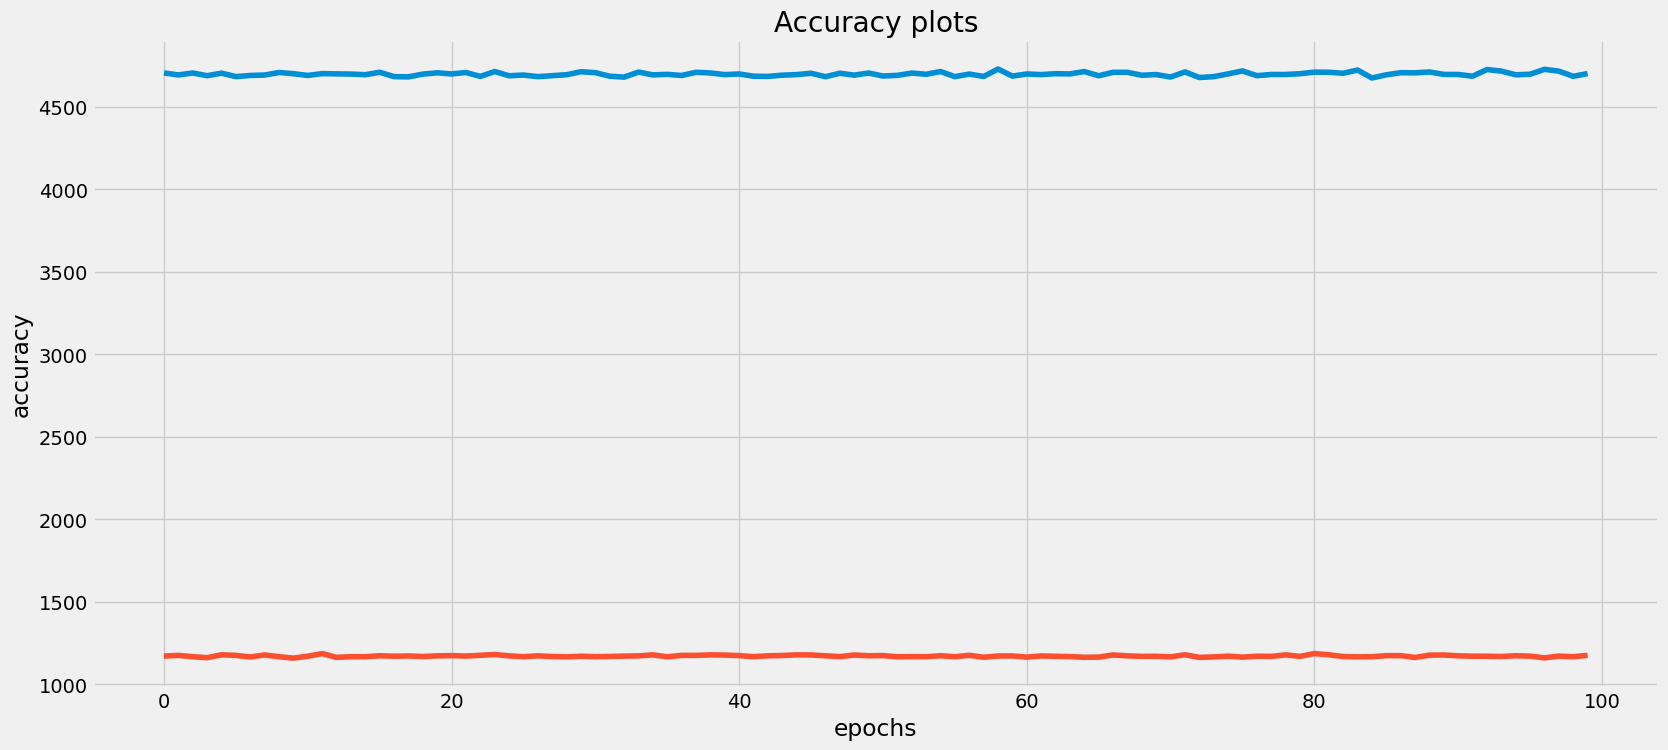

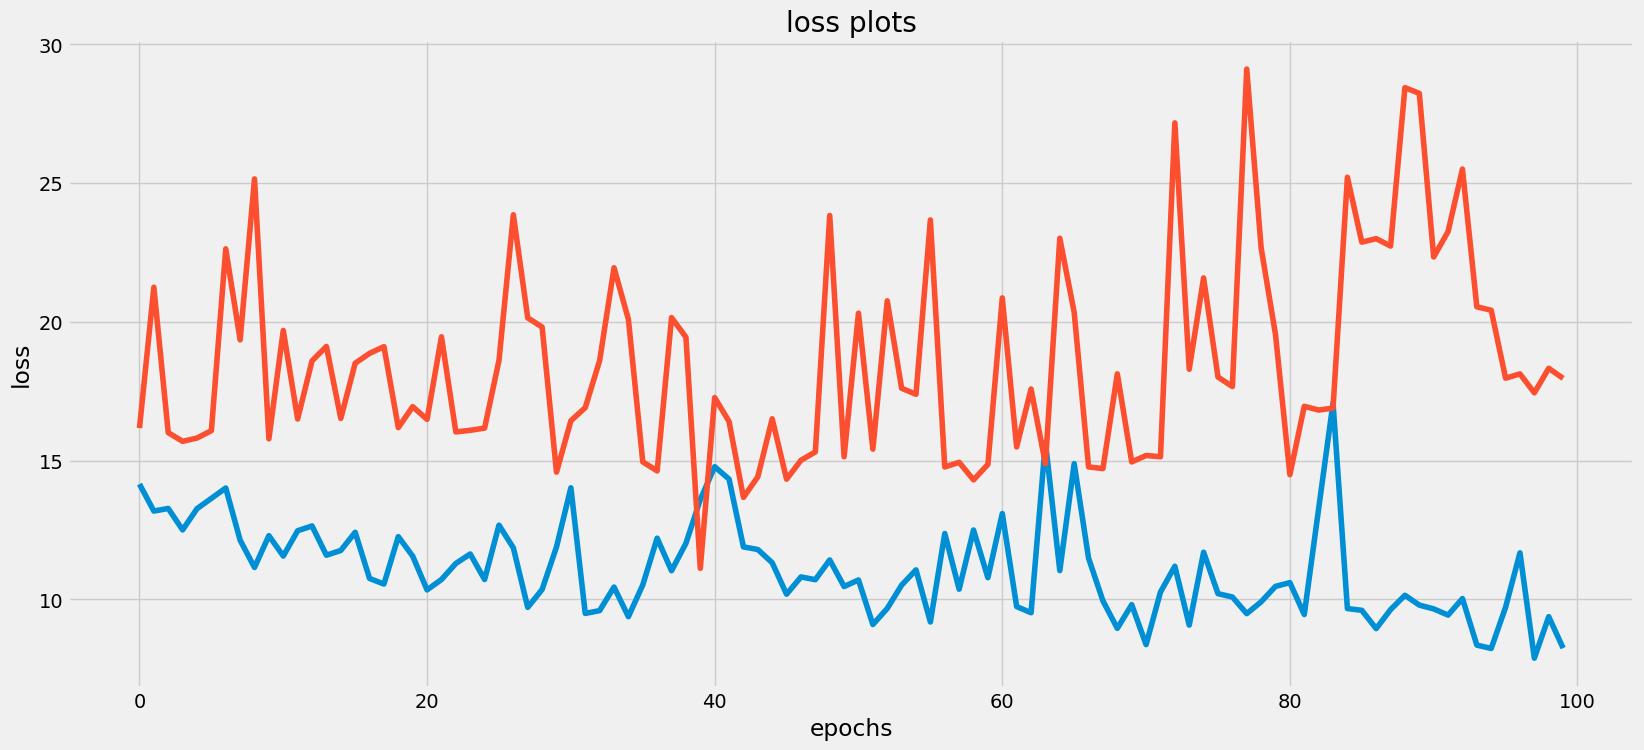

In [86]:
with plt.style.context(style="fivethirtyeight"):  
    plt.figure(figsize=(18,8))  
    plt.plot(history['train_accuracy'],label="train accuracy")  
    plt.plot(history['val_accuracy'],label="val accuracy")  
    plt.title(label="Accuracy plots")  
    plt.xlabel(xlabel='epochs')  
    plt.ylabel(ylabel='accuracy')  
    plt.show()  
     
    plt.figure(figsize=(18,8))  
    plt.plot(history['train_loss'],label="train loss")  
    plt.plot(history['val_loss'],label="val loss")  
    plt.title(label="loss plots")  
    plt.xlabel(xlabel='epochs')  
    plt.ylabel(ylabel='loss')  
    plt.show()  